In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
homeprices = pd.read_csv("homeprices.applied.econ.csv")

In [3]:
#getting familiar with data
homeprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [4]:
#looking for missing values
homeprices.isna().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [5]:
#Do homes with a full basement have a higher sales price than homes without a full basement? 
homeprices.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


In [7]:
#dividing the data with fullbase values
homeprices_with_fullbase = homeprices[(homeprices['fullbase']== 'yes')]
len(homeprices_with_fullbase)

191

In [9]:
homeprices_nofullbase = homeprices[(homeprices['fullbase']== 'no')]
len(homeprices_nofullbase)

355

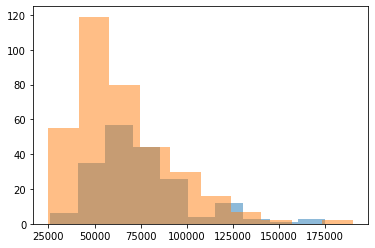

In [13]:
plt.hist(homeprices_with_fullbase['price'], alpha = 0.5)
plt.hist(homeprices_nofullbase['price'], alpha = 0.5)
plt.show()

In [14]:
print(stats.describe(homeprices_with_fullbase['price']))
print(stats.describe(homeprices_nofullbase['price']))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


In [17]:
stats.ttest_ind(homeprices_with_fullbase['price'], homeprices_nofullbase['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

In [ ]:
##t-statistic > 1.96 and p-value < 0.05, we reject null hypothesis and there is a significant difference in 
#prices with fullbase and prices with nobase


In [15]:
def get_95_ci(array_1, array_2):
    n1 = array_1.shape[0]
    n2 = array_2.shape[0]
    X1_bar = array_1.mean()
    X2_bar = array_2.mean()
    mean_diff = X1_bar - X2_bar
    var1 = array_1.var()
    var2 = array_2.var()
    std_error_diff = math.sqrt((var1/n1)+var2/n2)
    margin_of_error = 1.96* std_error_diff
    ci_lower = mean_diff - margin_of_error
    ci_upper = mean_diff + margin_of_error
    return(ci_lower, ci_upper)
get_95_ci(homeprices_with_fullbase['price'], homeprices_nofullbase['price'])

(5801.544262762097, 15032.294775656886)

[[Text(0, 0, 'fullbase'), Text(0, 0, 'nobase')]]

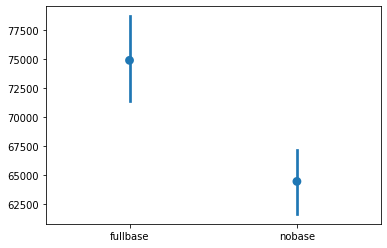

In [20]:
import seaborn as sns
g = sns.pointplot(data = (homeprices_with_fullbase['price'], homeprices_nofullbase['price']), join = False)
g.set(xticklabels = ['fullbase', 'nobase'] )